Filon integration
=======

In [1]:
import numpy as np
from scipy.special import sici
import filon
import matplotlib.pyplot as plt
import time
times={}

/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/szabo/pyTableTest/venv/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm


In [2]:
def testFunc(x,r,a):
    return np.log(a*x)*np.cos(x*r)

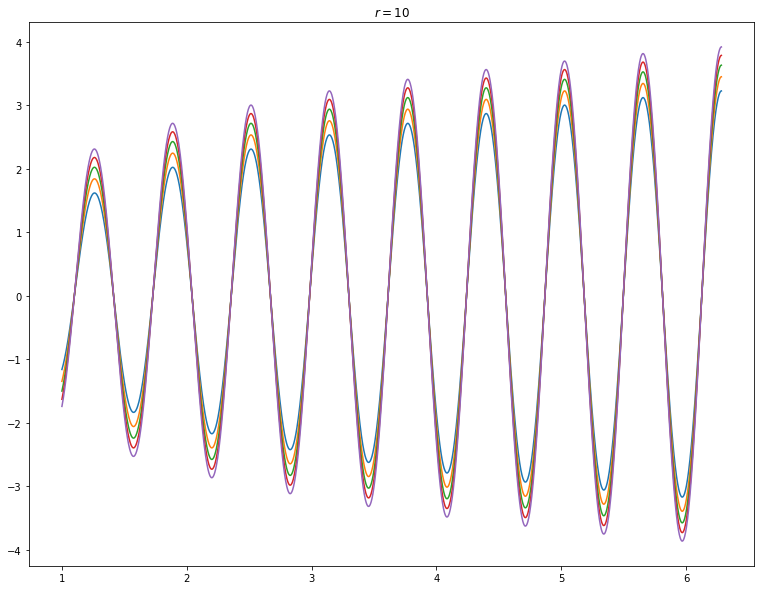

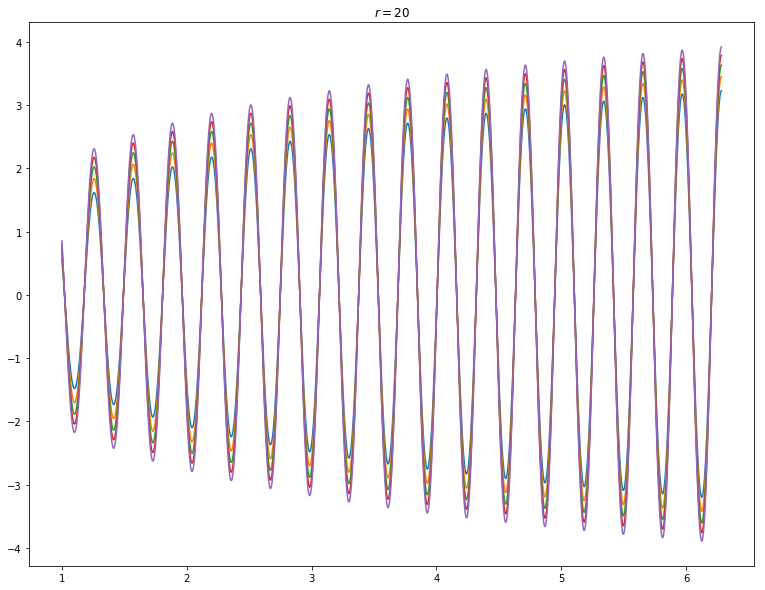

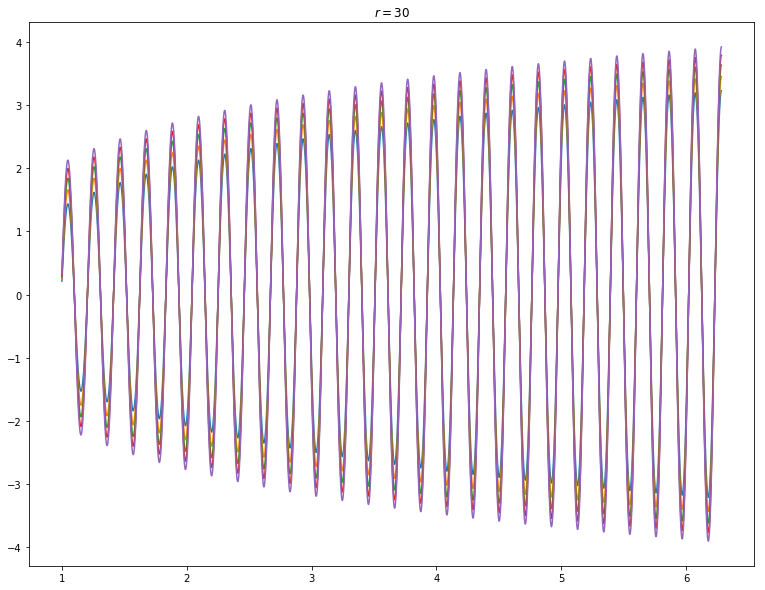

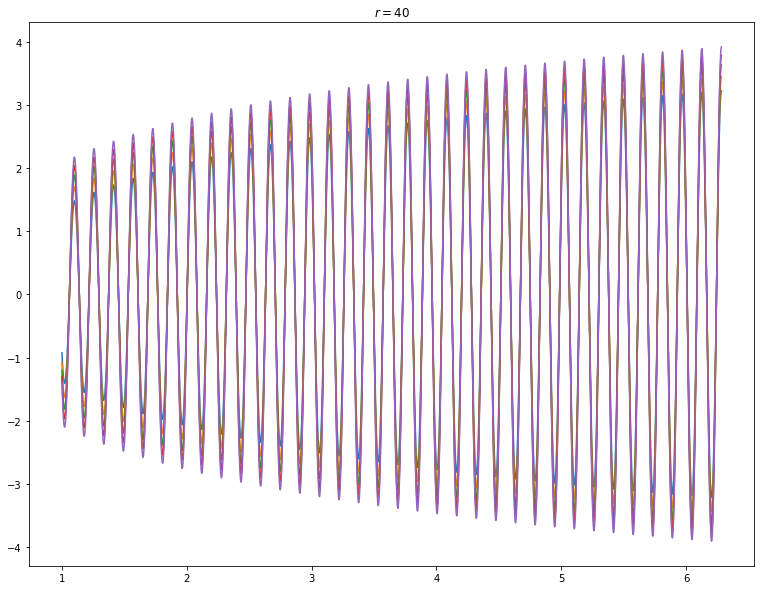

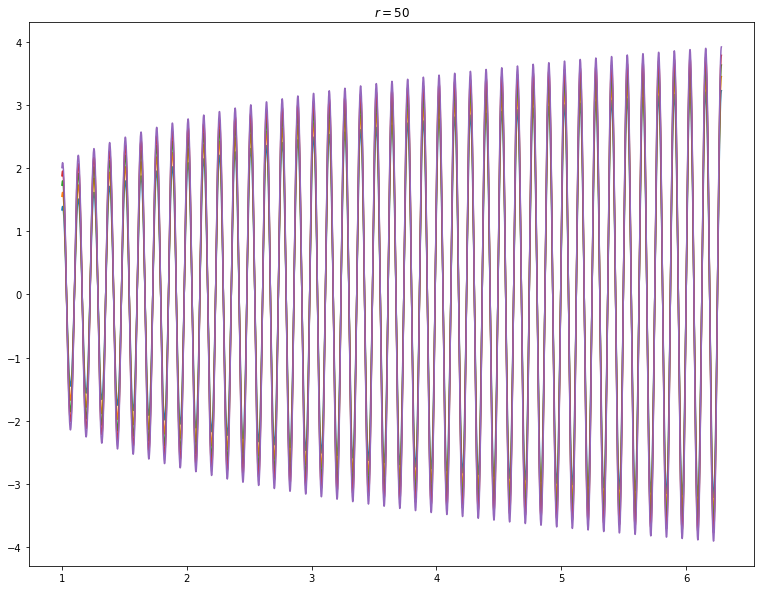

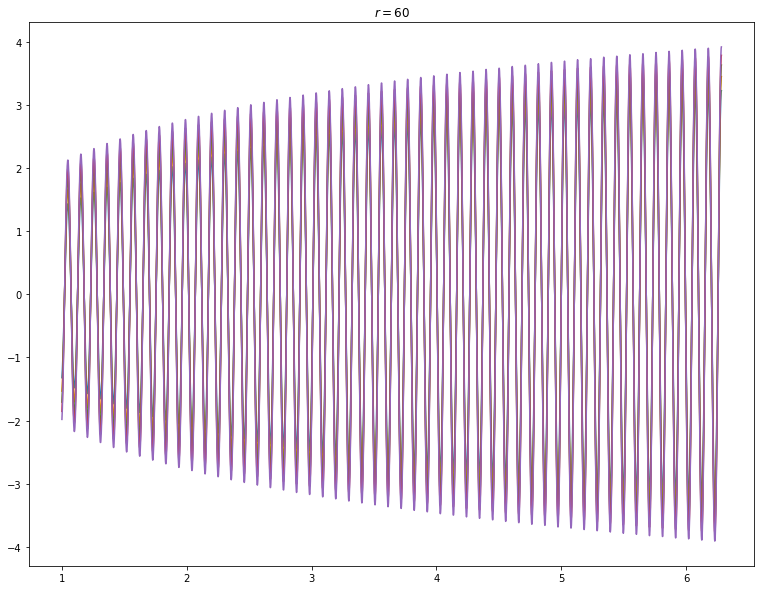

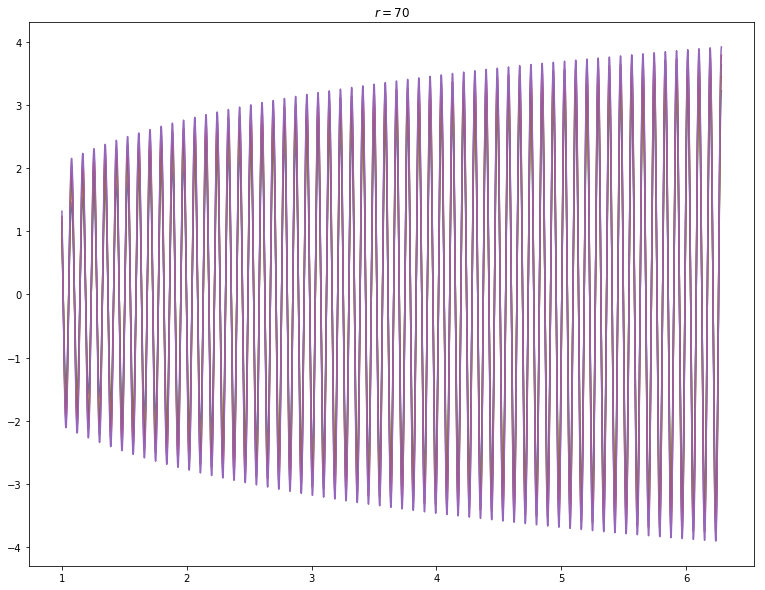

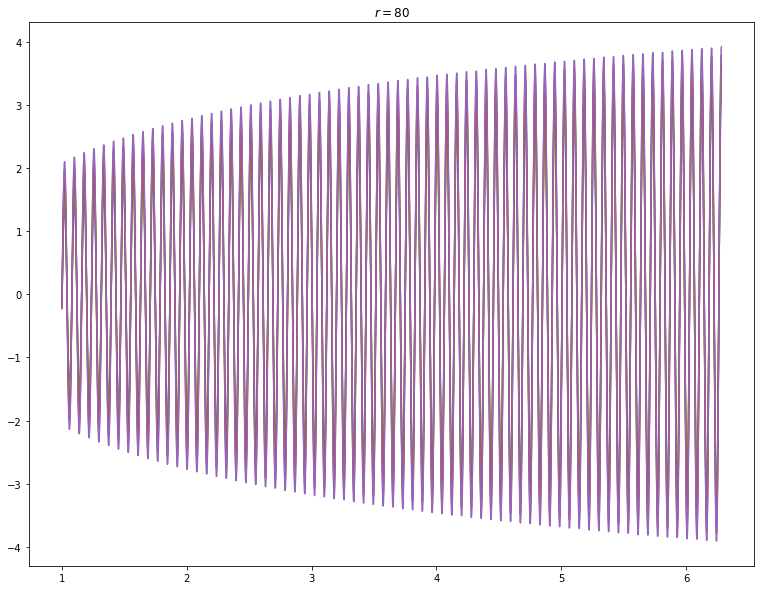

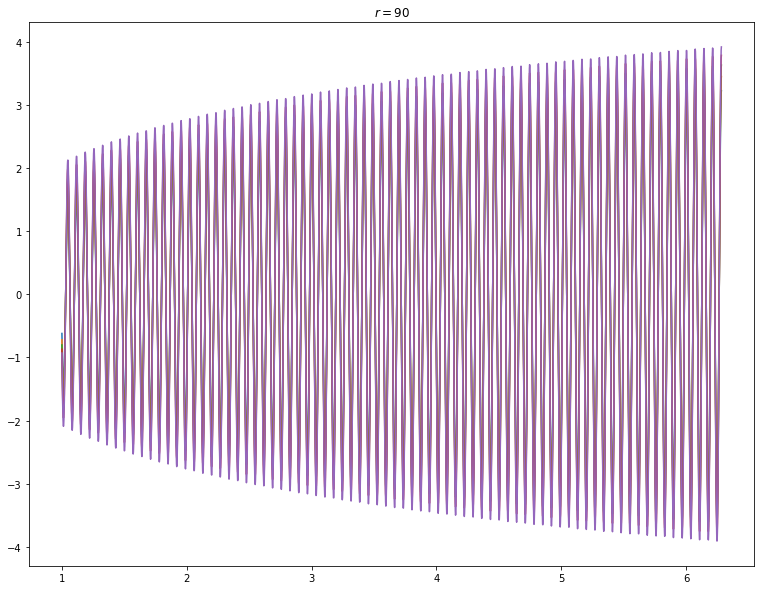

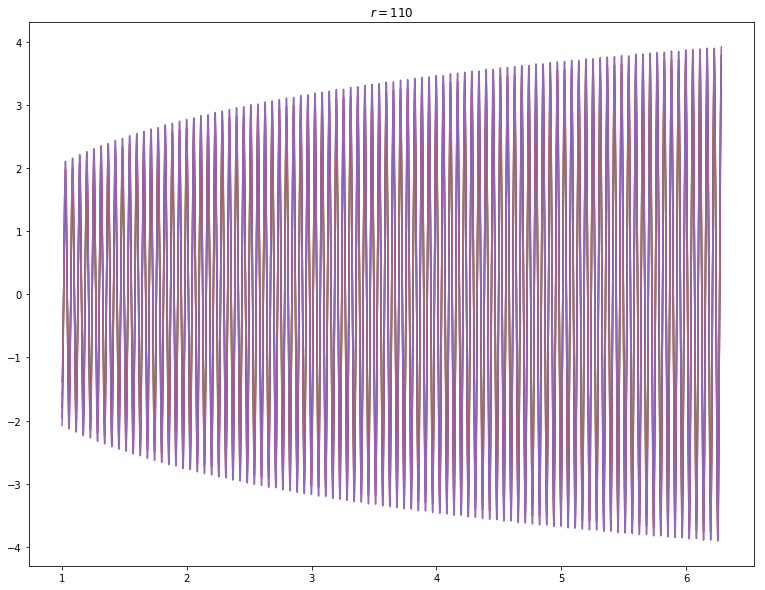

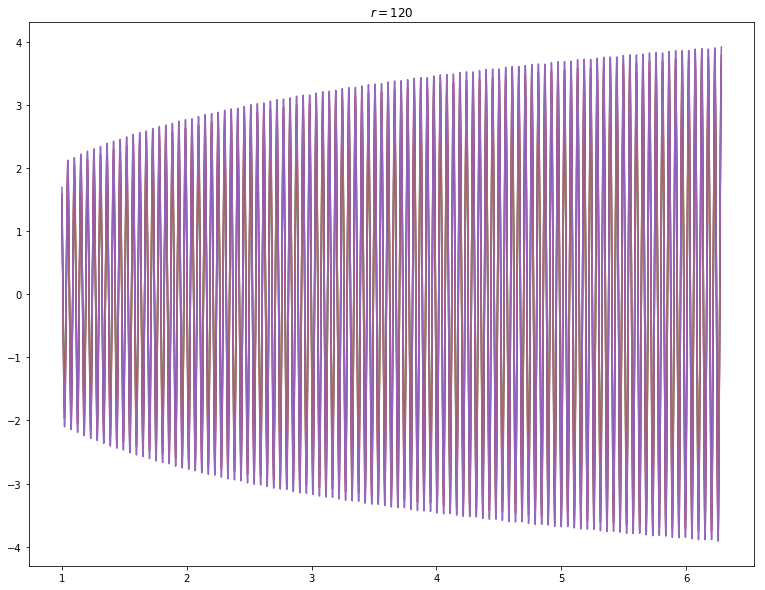

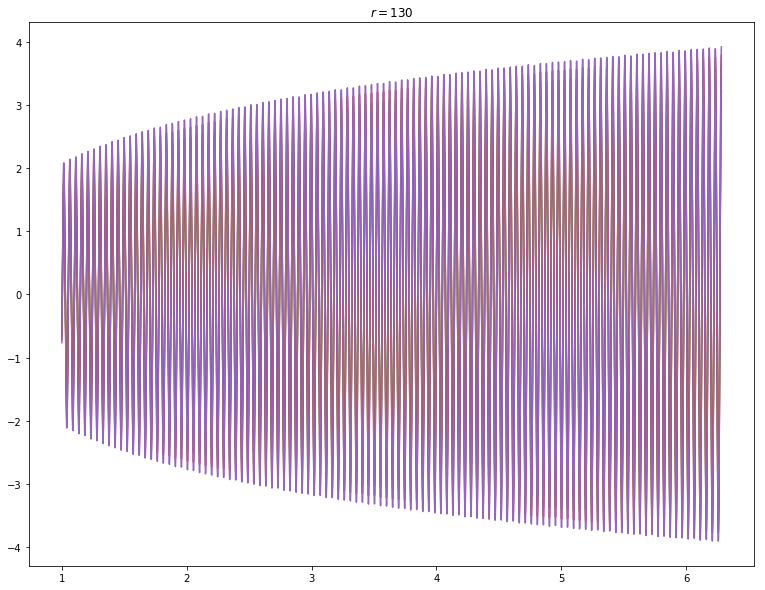

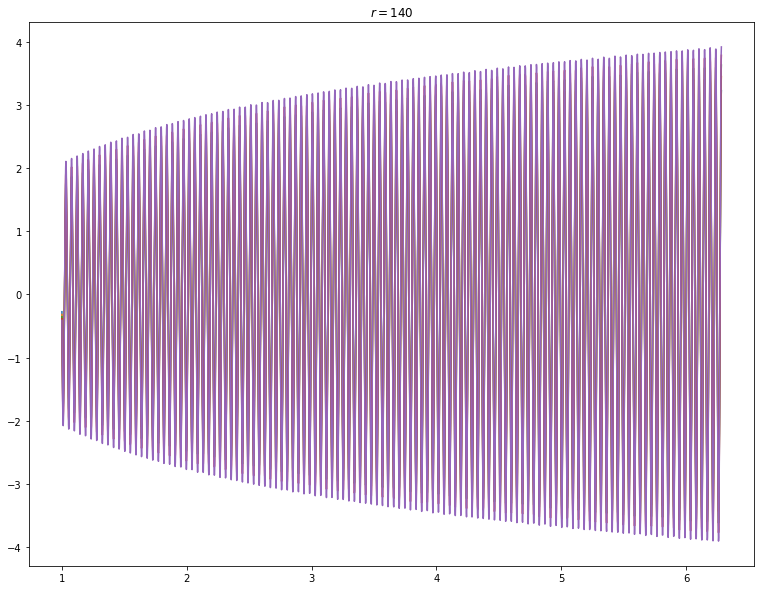

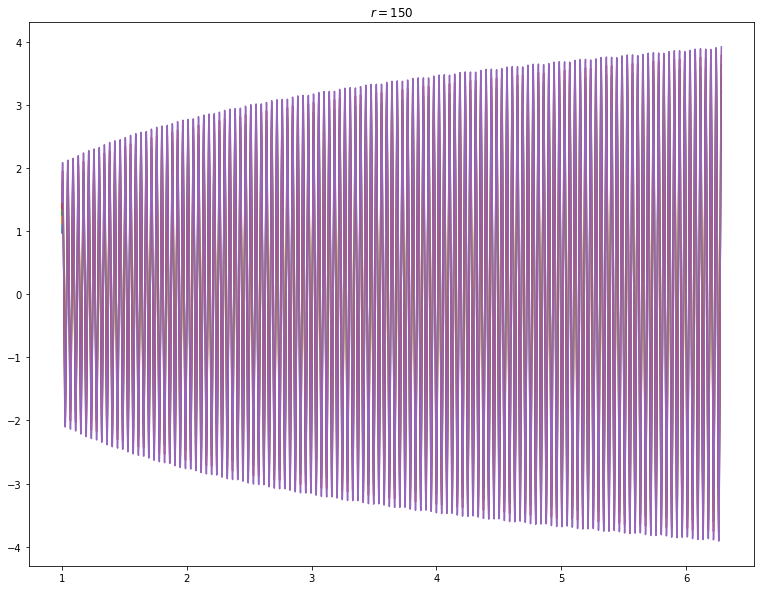

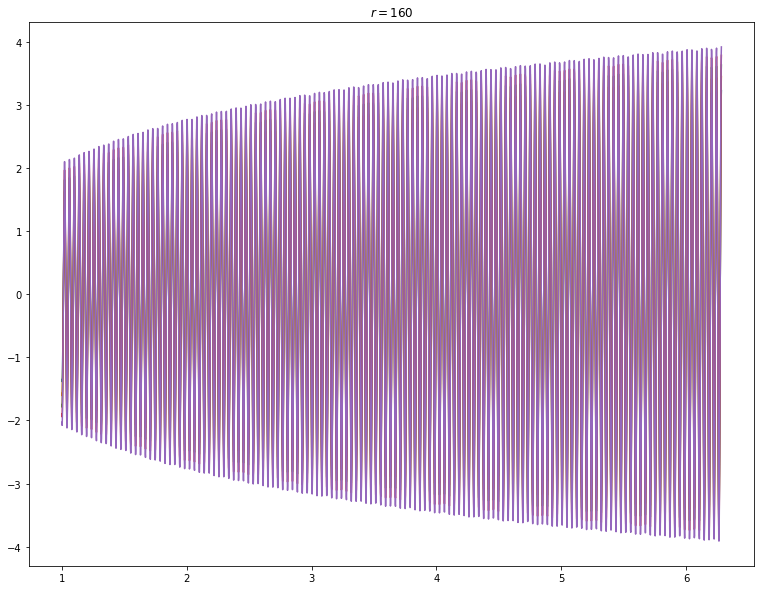

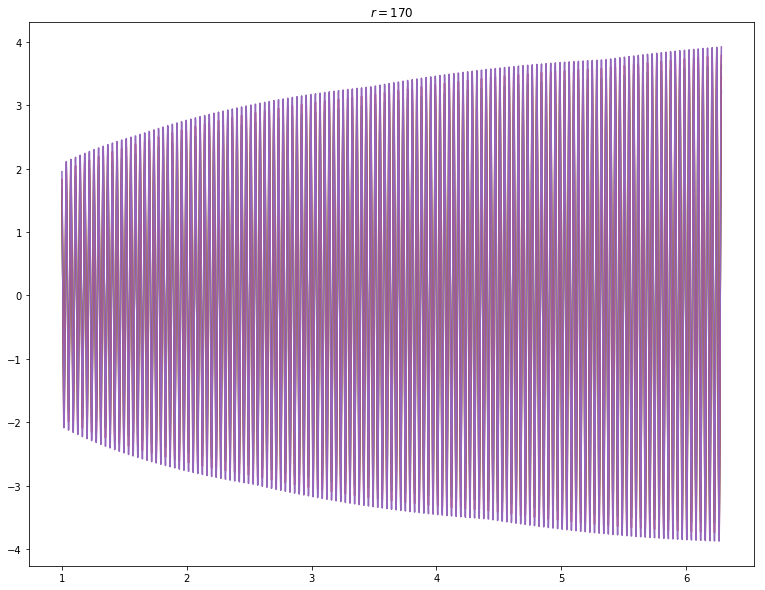

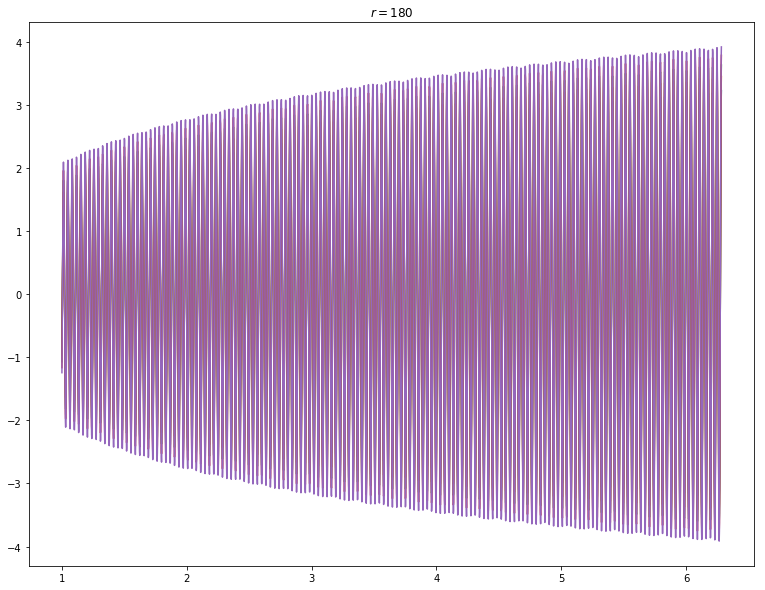

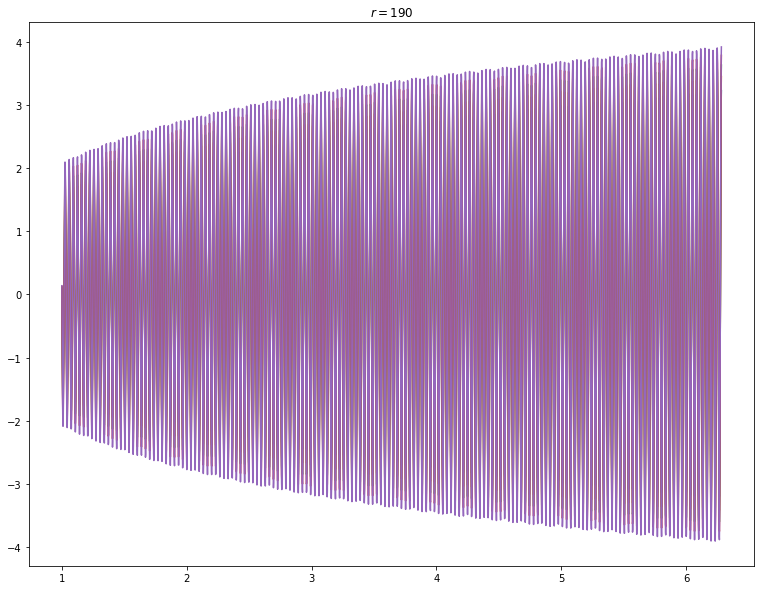

In [3]:

args = np.linspace(1,2.0*np.pi,3000)
for el in np.arange(10,200,10):
    fig = plt.figure(figsize=(13,10))
    for el2 in [4,5,6,7,8]:
        vals = testFunc(args,el,el2)
        plt.plot(args,vals,label="%s"%el2)
    plt.title("$r = %s$"%el)
    plt.show()


Single evaluation
==========

Exact solution
---------

In [4]:
def exactINDEF(r,a,x):
    return (np.log(a*x)*np.sin(r*x) - sici(r*x)[0])/r

def exact(r,a,low,up):
    return exactINDEF(r,a,up) - exactINDEF(r,a,low)

start = time.time()
resE = exact(np.arange(10,200,10),10,1,2.0*np.pi)
end = time.time() - start
times['exact'] = end

Solution with Filon
---------

In [5]:
def integrand(a,x):
    return np.log(a*x)

def filonInt(r,a,low,up,n=125):
    tempArgs,steps = np.linspace(low,up,n,retstep=True,endpoint=True)
    intArr = integrand(a,tempArgs)
    #print intArr.shape
    res = filon.cos_integral(intArr,steps,r,low)
    return res
start = time.time()
resF = filonInt(np.arange(10,200,10),10,1,2.0*np.pi,125)
end = time.time() - start
times['filon']=end

In [17]:
print "="*30 + " test against the exact solution" + "="*30
for i,el in enumerate(resF):
    print "%1.4e \t%1.4e \t| %1.4e \t%1.4e"%(el,resE[i],resE[i] - el,np.abs((resE[i] - el)/(resE[i] + el)))
print "-"*80
print "="*30 + " time against the exact solution" + "="*30
calls = len(resF)
print "full time (%d calls):  %1.4e | %1.4e"%(calls,times['filon'],times['exact'])
print "time per call:         %1.4e | %1.4e"%(times['filon']/calls,times['exact']/calls)

============================== test against the exact solution==============================
1.3561e-01 	1.3561e-01 	| -1.3122e-07 	4.8383e-07
-1.0584e-01 	-1.0584e-01 	| 7.2951e-08 	3.4464e-07
7.5876e-02 	7.5876e-02 	| 2.2610e-08 	1.4900e-07
-4.2388e-02 	-4.2388e-02 	| -1.3941e-07 	1.6445e-06
1.1763e-02 	1.1763e-02 	| 2.5374e-07 	1.0786e-05
1.2008e-02 	1.2008e-02 	| -3.5321e-07 	1.4707e-05
-2.5556e-02 	-2.5555e-02 	| 1.2166e-07 	2.3803e-06
2.8650e-02 	2.8650e-02 	| 3.2440e-07 	5.6614e-06
-2.2799e-02 	-2.2799e-02 	| 7.6014e-08 	1.6671e-06
1.1590e-02 	1.1590e-02 	| -1.1427e-07 	4.9297e-06
1.0218e-03 	1.0219e-03 	| 8.7547e-08 	4.2839e-05
-1.1187e-02 	-1.1187e-02 	| -4.3010e-08 	1.9224e-06
1.6506e-02 	1.6506e-02 	| 8.5767e-09 	2.5981e-07
-1.6104e-02 	-1.6104e-02 	| -2.1496e-08 	6.6741e-07
1.0950e-02 	1.0950e-02 	| -1.5298e-08 	6.9855e-07
-3.1136e-03 	-3.1135e-03 	| 7.0100e-08 	1.1257e-05
-4.7222e-03 	-4.7223e-03 	| -4.8892e-08 	5.1768e-06
1.0272e-02 	1.0272e-02 	| 2.3933e-08 	1.1649e-06
-

Array evaluation
===========

Exact solution
---------

In [43]:
rArr = np.arange(10,200,1)
aArr = np.arange(101) + np.ones(101)
rGrid = rArr[:,np.newaxis]
aGrid = aArr[np.newaxis,:]
start = time.time()
resEall = exact(rGrid,aGrid,1,2.0*np.pi)
end = time.time() - start
times['exactAll'] = end

Solution with Filon
---------

In [46]:
def filonIntAll(r,a,low,up,n=1001): 
    aGrid = a[np.newaxis,:]
    args,steps = np.linspace(low,up,n,retstep=True,endpoint=True)
    argsGrid = args[:,np.newaxis]
    intArr = integrand(aGrid,argsGrid)
    #print intArr.shape
    res = filon.cos_integral(intArr,steps,r,low,axis=0)
    #print a.shape
    return res

rArr = np.arange(10,200,1)
aArr = np.arange(101) + np.ones(101)
print rArr
start = time.time()
resFall = filonIntAll(rArr,aArr,1,2.0*np.pi)
end = time.time() - start
times['filonAll'] = end

[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]


Compare Filon with exact
-------

In [47]:
ind = 0
for ir,rel in enumerate(rArr):
    for ia,ael in enumerate(aArr):
        print "%d:\t %1.4e\t%1.4e\t| %1.4e \t%1.4e \t| %1.4e \t%1.4e"%(ind,rel,ael,resFall[ir][ia],resEall[ir][ia],resFall[ir][ia]-resEall[ir][ia],np.abs((resFall[ir][ia]-resEall[ir][ia])/(resFall[ir][ia]+resEall[ir][ia])))
        ind+=1
calls = len(rArr) * len(aArr)
print "full time (%d calls):  \t%1.4e | %1.4e"%(calls,times['filonAll'],times['exactAll'])
print "time per call:         \t\t%1.4e | %1.4e"%(times['filonAll']/calls,times['exactAll']/calls)

0:	 1.0000e+01	1.0000e+00	| 1.0346e-02 	1.0346e-02 	| 3.0728e-11 	1.4851e-09
1:	 1.0000e+01	2.0000e+00	| 4.8055e-02 	4.8055e-02 	| 3.0725e-11 	3.1969e-10
2:	 1.0000e+01	3.0000e+00	| 7.0113e-02 	7.0113e-02 	| 3.0723e-11 	2.1910e-10
3:	 1.0000e+01	4.0000e+00	| 8.5763e-02 	8.5763e-02 	| 3.0722e-11 	1.7911e-10
4:	 1.0000e+01	5.0000e+00	| 9.7903e-02 	9.7903e-02 	| 3.0721e-11 	1.5689e-10
5:	 1.0000e+01	6.0000e+00	| 1.0782e-01 	1.0782e-01 	| 3.0720e-11 	1.4246e-10
6:	 1.0000e+01	7.0000e+00	| 1.1621e-01 	1.1621e-01 	| 3.0719e-11 	1.3217e-10
7:	 1.0000e+01	8.0000e+00	| 1.2347e-01 	1.2347e-01 	| 3.0718e-11 	1.2439e-10
8:	 1.0000e+01	9.0000e+00	| 1.2988e-01 	1.2988e-01 	| 3.0718e-11 	1.1826e-10
9:	 1.0000e+01	1.0000e+01	| 1.3561e-01 	1.3561e-01 	| 3.0717e-11 	1.1326e-10
10:	 1.0000e+01	1.1000e+01	| 1.4080e-01 	1.4080e-01 	| 3.0717e-11 	1.0908e-10
11:	 1.0000e+01	1.2000e+01	| 1.4553e-01 	1.4553e-01 	| 3.0716e-11 	1.0553e-10
12:	 1.0000e+01	1.3000e+01	| 1.4988e-01 	1.4988e-01 	| 3.0716e-11 	1.0247e

1179:	 2.1000e+01	6.9000e+01	| -1.6718e-01 	-1.6718e-01 	| 1.5798e-11 	4.7248e-11
1180:	 2.1000e+01	7.0000e+01	| -1.6775e-01 	-1.6775e-01 	| 1.5798e-11 	4.7088e-11
1181:	 2.1000e+01	7.1000e+01	| -1.6832e-01 	-1.6832e-01 	| 1.5798e-11 	4.6929e-11
1182:	 2.1000e+01	7.2000e+01	| -1.6888e-01 	-1.6888e-01 	| 1.5798e-11 	4.6773e-11
1183:	 2.1000e+01	7.3000e+01	| -1.6943e-01 	-1.6943e-01 	| 1.5798e-11 	4.6622e-11
1184:	 2.1000e+01	7.4000e+01	| -1.6997e-01 	-1.6997e-01 	| 1.5798e-11 	4.6473e-11
1185:	 2.1000e+01	7.5000e+01	| -1.7050e-01 	-1.7050e-01 	| 1.5798e-11 	4.6327e-11
1186:	 2.1000e+01	7.6000e+01	| -1.7103e-01 	-1.7103e-01 	| 1.5798e-11 	4.6184e-11
1187:	 2.1000e+01	7.7000e+01	| -1.7155e-01 	-1.7155e-01 	| 1.5798e-11 	4.6043e-11
1188:	 2.1000e+01	7.8000e+01	| -1.7207e-01 	-1.7207e-01 	| 1.5798e-11 	4.5906e-11
1189:	 2.1000e+01	7.9000e+01	| -1.7257e-01 	-1.7257e-01 	| 1.5798e-11 	4.5771e-11
1190:	 2.1000e+01	8.0000e+01	| -1.7307e-01 	-1.7307e-01 	| 1.5798e-11 	4.5638e-11
1191:	 2.1000e+0

2119:	 3.0000e+01	1.0000e+02	| 1.5171e-01 	1.5171e-01 	| -2.6640e-12 	8.7798e-12
2120:	 3.0000e+01	1.0100e+02	| 1.5204e-01 	1.5204e-01 	| -2.6645e-12 	8.7625e-12
2121:	 3.1000e+01	1.0000e+00	| -7.7082e-04 	-7.7082e-04 	| -3.0339e-11 	1.9680e-08
2122:	 3.1000e+01	2.0000e+00	| 8.2633e-03 	8.2633e-03 	| -3.0338e-11 	1.8357e-09
2123:	 3.1000e+01	3.0000e+00	| 1.3548e-02 	1.3548e-02 	| -3.0338e-11 	1.1197e-09
2124:	 3.1000e+01	4.0000e+00	| 1.7297e-02 	1.7297e-02 	| -3.0338e-11 	8.7694e-10
2125:	 3.1000e+01	5.0000e+00	| 2.0206e-02 	2.0206e-02 	| -3.0338e-11 	7.5072e-10
2126:	 3.1000e+01	6.0000e+00	| 2.2582e-02 	2.2582e-02 	| -3.0337e-11 	6.7171e-10
2127:	 3.1000e+01	7.0000e+00	| 2.4591e-02 	2.4591e-02 	| -3.0337e-11 	6.1683e-10
2128:	 3.1000e+01	8.0000e+00	| 2.6332e-02 	2.6332e-02 	| -3.0337e-11 	5.7606e-10
2129:	 3.1000e+01	9.0000e+00	| 2.7867e-02 	2.7867e-02 	| -3.0337e-11 	5.4432e-10
2130:	 3.1000e+01	1.0000e+01	| 2.9240e-02 	2.9240e-02 	| -3.0337e-11 	5.1876e-10
2131:	 3.1000e+01	1.1000e+

2819:	 3.7000e+01	9.3000e+01	| 7.8406e-02 	7.8406e-02 	| -2.4966e-11 	1.5921e-10
2820:	 3.7000e+01	9.4000e+01	| 7.8592e-02 	7.8592e-02 	| -2.4966e-11 	1.5883e-10
2821:	 3.7000e+01	9.5000e+01	| 7.8776e-02 	7.8776e-02 	| -2.4966e-11 	1.5846e-10
2822:	 3.7000e+01	9.6000e+01	| 7.8958e-02 	7.8958e-02 	| -2.4966e-11 	1.5809e-10
2823:	 3.7000e+01	9.7000e+01	| 7.9138e-02 	7.9138e-02 	| -2.4966e-11 	1.5773e-10
2824:	 3.7000e+01	9.8000e+01	| 7.9317e-02 	7.9317e-02 	| -2.4966e-11 	1.5738e-10
2825:	 3.7000e+01	9.9000e+01	| 7.9493e-02 	7.9493e-02 	| -2.4966e-11 	1.5703e-10
2826:	 3.7000e+01	1.0000e+02	| 7.9668e-02 	7.9668e-02 	| -2.4966e-11 	1.5669e-10
2827:	 3.7000e+01	1.0100e+02	| 7.9841e-02 	7.9841e-02 	| -2.4966e-11 	1.5635e-10
2828:	 3.8000e+01	1.0000e+00	| -5.5566e-04 	-5.5566e-04 	| -3.3448e-11 	3.0098e-08
2829:	 3.8000e+01	2.0000e+00	| -5.9616e-03 	-5.9616e-03 	| -3.3448e-11 	2.8053e-09
2830:	 3.8000e+01	3.0000e+00	| -9.1239e-03 	-9.1239e-03 	| -3.3449e-11 	1.8330e-09
2831:	 3.8000e+01	4.00

3581:	 4.5000e+01	4.7000e+01	| -7.2992e-02 	-7.2992e-02 	| -1.9491e-11 	1.3351e-10
3582:	 4.5000e+01	4.8000e+01	| -7.3390e-02 	-7.3390e-02 	| -1.9490e-11 	1.3278e-10
3583:	 4.5000e+01	4.9000e+01	| -7.3780e-02 	-7.3780e-02 	| -1.9490e-11 	1.3208e-10
3584:	 4.5000e+01	5.0000e+01	| -7.4162e-02 	-7.4162e-02 	| -1.9490e-11 	1.3140e-10
3585:	 4.5000e+01	5.1000e+01	| -7.4537e-02 	-7.4537e-02 	| -1.9490e-11 	1.3074e-10
3586:	 4.5000e+01	5.2000e+01	| -7.4904e-02 	-7.4904e-02 	| -1.9490e-11 	1.3010e-10
3587:	 4.5000e+01	5.3000e+01	| -7.5264e-02 	-7.5264e-02 	| -1.9490e-11 	1.2948e-10
3588:	 4.5000e+01	5.4000e+01	| -7.5617e-02 	-7.5617e-02 	| -1.9490e-11 	1.2887e-10
3589:	 4.5000e+01	5.5000e+01	| -7.5964e-02 	-7.5964e-02 	| -1.9490e-11 	1.2828e-10
3590:	 4.5000e+01	5.6000e+01	| -7.6305e-02 	-7.6305e-02 	| -1.9490e-11 	1.2771e-10
3591:	 4.5000e+01	5.7000e+01	| -7.6640e-02 	-7.6640e-02 	| -1.9490e-11 	1.2715e-10
3592:	 4.5000e+01	5.8000e+01	| -7.6969e-02 	-7.6969e-02 	| -1.9490e-11 	1.2661e-10
3593

4199:	 5.1000e+01	5.9000e+01	| -5.3815e-02 	-5.3815e-02 	| -2.6640e-11 	2.4752e-10
4200:	 5.1000e+01	6.0000e+01	| -5.4036e-02 	-5.4036e-02 	| -2.6640e-11 	2.4651e-10
4201:	 5.1000e+01	6.1000e+01	| -5.4253e-02 	-5.4253e-02 	| -2.6640e-11 	2.4552e-10
4202:	 5.1000e+01	6.2000e+01	| -5.4467e-02 	-5.4467e-02 	| -2.6640e-11 	2.4456e-10
4203:	 5.1000e+01	6.3000e+01	| -5.4677e-02 	-5.4677e-02 	| -2.6640e-11 	2.4362e-10
4204:	 5.1000e+01	6.4000e+01	| -5.4884e-02 	-5.4884e-02 	| -2.6640e-11 	2.4269e-10
4205:	 5.1000e+01	6.5000e+01	| -5.5088e-02 	-5.5088e-02 	| -2.6640e-11 	2.4180e-10
4206:	 5.1000e+01	6.6000e+01	| -5.5288e-02 	-5.5288e-02 	| -2.6640e-11 	2.4092e-10
4207:	 5.1000e+01	6.7000e+01	| -5.5486e-02 	-5.5486e-02 	| -2.6640e-11 	2.4006e-10
4208:	 5.1000e+01	6.8000e+01	| -5.5681e-02 	-5.5681e-02 	| -2.6640e-11 	2.3922e-10
4209:	 5.1000e+01	6.9000e+01	| -5.5873e-02 	-5.5873e-02 	| -2.6640e-11 	2.3840e-10
4210:	 5.1000e+01	7.0000e+01	| -5.6062e-02 	-5.6062e-02 	| -2.6640e-11 	2.3760e-10
4211

5084:	 6.0000e+01	3.5000e+01	| 1.8372e-02 	1.8372e-02 	| 3.3747e-11 	9.1845e-10
5085:	 6.0000e+01	3.6000e+01	| 1.8515e-02 	1.8515e-02 	| 3.3747e-11 	9.1136e-10
5086:	 6.0000e+01	3.7000e+01	| 1.8654e-02 	1.8654e-02 	| 3.3747e-11 	9.0456e-10
5087:	 6.0000e+01	3.8000e+01	| 1.8790e-02 	1.8790e-02 	| 3.3748e-11 	8.9804e-10
5088:	 6.0000e+01	3.9000e+01	| 1.8922e-02 	1.8922e-02 	| 3.3748e-11 	8.9177e-10
5089:	 6.0000e+01	4.0000e+01	| 1.9050e-02 	1.9050e-02 	| 3.3748e-11 	8.8576e-10
5090:	 6.0000e+01	4.1000e+01	| 1.9176e-02 	1.9176e-02 	| 3.3748e-11 	8.7996e-10
5091:	 6.0000e+01	4.2000e+01	| 1.9298e-02 	1.9298e-02 	| 3.3748e-11 	8.7438e-10
5092:	 6.0000e+01	4.3000e+01	| 1.9418e-02 	1.9418e-02 	| 3.3748e-11 	8.6900e-10
5093:	 6.0000e+01	4.4000e+01	| 1.9534e-02 	1.9534e-02 	| 3.3748e-11 	8.6381e-10
5094:	 6.0000e+01	4.5000e+01	| 1.9649e-02 	1.9649e-02 	| 3.3748e-11 	8.5879e-10
5095:	 6.0000e+01	4.6000e+01	| 1.9760e-02 	1.9760e-02 	| 3.3748e-11 	8.5394e-10
5096:	 6.0000e+01	4.7000e+01	| 1.9869e-0

5821:	 6.7000e+01	6.5000e+01	| 5.3456e-02 	5.3456e-02 	| 1.9209e-11 	1.7967e-10
5822:	 6.7000e+01	6.6000e+01	| 5.3651e-02 	5.3651e-02 	| 1.9210e-11 	1.7902e-10
5823:	 6.7000e+01	6.7000e+01	| 5.3843e-02 	5.3843e-02 	| 1.9209e-11 	1.7838e-10
5824:	 6.7000e+01	6.8000e+01	| 5.4032e-02 	5.4032e-02 	| 1.9209e-11 	1.7776e-10
5825:	 6.7000e+01	6.9000e+01	| 5.4219e-02 	5.4219e-02 	| 1.9210e-11 	1.7715e-10
5826:	 6.7000e+01	7.0000e+01	| 5.4402e-02 	5.4402e-02 	| 1.9210e-11 	1.7655e-10
5827:	 6.7000e+01	7.1000e+01	| 5.4584e-02 	5.4584e-02 	| 1.9209e-11 	1.7596e-10
5828:	 6.7000e+01	7.2000e+01	| 5.4762e-02 	5.4762e-02 	| 1.9210e-11 	1.7539e-10
5829:	 6.7000e+01	7.3000e+01	| 5.4938e-02 	5.4938e-02 	| 1.9209e-11 	1.7483e-10
5830:	 6.7000e+01	7.4000e+01	| 5.5112e-02 	5.5112e-02 	| 1.9210e-11 	1.7428e-10
5831:	 6.7000e+01	7.5000e+01	| 5.5283e-02 	5.5283e-02 	| 1.9210e-11 	1.7374e-10
5832:	 6.7000e+01	7.6000e+01	| 5.5453e-02 	5.5453e-02 	| 1.9210e-11 	1.7321e-10
5833:	 6.7000e+01	7.7000e+01	| 5.5619e-0

6766:	 7.6000e+01	1.0100e+02	| -3.4493e-02 	-3.4493e-02 	| -2.9350e-11 	4.2544e-10
6767:	 7.7000e+01	1.0000e+00	| 2.9879e-05 	2.9879e-05 	| 2.7438e-13 	4.5915e-09
6768:	 7.7000e+01	2.0000e+00	| -8.9677e-03 	-8.9677e-03 	| 2.7449e-13 	1.5304e-11
6769:	 7.7000e+01	3.0000e+00	| -1.4231e-02 	-1.4231e-02 	| 2.7447e-13 	9.6435e-12
6770:	 7.7000e+01	4.0000e+00	| -1.7965e-02 	-1.7965e-02 	| 2.7448e-13 	7.6392e-12
6771:	 7.7000e+01	5.0000e+00	| -2.0862e-02 	-2.0862e-02 	| 2.7461e-13 	6.5815e-12
6772:	 7.7000e+01	6.0000e+00	| -2.3229e-02 	-2.3229e-02 	| 2.7462e-13 	5.9113e-12
6773:	 7.7000e+01	7.0000e+00	| -2.5230e-02 	-2.5230e-02 	| 2.7459e-13 	5.4419e-12
6774:	 7.7000e+01	8.0000e+00	| -2.6963e-02 	-2.6963e-02 	| 2.7461e-13 	5.0924e-12
6775:	 7.7000e+01	9.0000e+00	| -2.8492e-02 	-2.8492e-02 	| 2.7460e-13 	4.8189e-12
6776:	 7.7000e+01	1.0000e+01	| -2.9859e-02 	-2.9859e-02 	| 2.7464e-13 	4.5990e-12
6777:	 7.7000e+01	1.1000e+01	| -3.1097e-02 	-3.1097e-02 	| 2.7466e-13 	4.4163e-12
6778:	 7.7000e+01

7388:	 8.3000e+01	1.6000e+01	| -3.2363e-02 	-3.2363e-02 	| -9.4940e-12 	1.4668e-10
7389:	 8.3000e+01	1.7000e+01	| -3.3070e-02 	-3.3070e-02 	| -9.4939e-12 	1.4354e-10
7390:	 8.3000e+01	1.8000e+01	| -3.3737e-02 	-3.3737e-02 	| -9.4939e-12 	1.4071e-10
7391:	 8.3000e+01	1.9000e+01	| -3.4368e-02 	-3.4368e-02 	| -9.4937e-12 	1.3812e-10
7392:	 8.3000e+01	2.0000e+01	| -3.4966e-02 	-3.4966e-02 	| -9.4937e-12 	1.3576e-10
7393:	 8.3000e+01	2.1000e+01	| -3.5535e-02 	-3.5535e-02 	| -9.4936e-12 	1.3358e-10
7394:	 8.3000e+01	2.2000e+01	| -3.6078e-02 	-3.6078e-02 	| -9.4936e-12 	1.3157e-10
7395:	 8.3000e+01	2.3000e+01	| -3.6597e-02 	-3.6597e-02 	| -9.4935e-12 	1.2970e-10
7396:	 8.3000e+01	2.4000e+01	| -3.7093e-02 	-3.7093e-02 	| -9.4934e-12 	1.2797e-10
7397:	 8.3000e+01	2.5000e+01	| -3.7570e-02 	-3.7570e-02 	| -9.4934e-12 	1.2634e-10
7398:	 8.3000e+01	2.6000e+01	| -3.8027e-02 	-3.8027e-02 	| -9.4933e-12 	1.2482e-10
7399:	 8.3000e+01	2.7000e+01	| -3.8467e-02 	-3.8467e-02 	| -9.4932e-12 	1.2339e-10
7400

8175:	 9.0000e+01	9.6000e+01	| -4.5265e-02 	-4.5265e-02 	| 1.5230e-11 	1.6823e-10
8176:	 9.0000e+01	9.7000e+01	| -4.5368e-02 	-4.5368e-02 	| 1.5230e-11 	1.6785e-10
8177:	 9.0000e+01	9.8000e+01	| -4.5470e-02 	-4.5470e-02 	| 1.5230e-11 	1.6747e-10
8178:	 9.0000e+01	9.9000e+01	| -4.5571e-02 	-4.5571e-02 	| 1.5230e-11 	1.6710e-10
8179:	 9.0000e+01	1.0000e+02	| -4.5671e-02 	-4.5671e-02 	| 1.5230e-11 	1.6673e-10
8180:	 9.0000e+01	1.0100e+02	| -4.5770e-02 	-4.5770e-02 	| 1.5230e-11 	1.6637e-10
8181:	 9.1000e+01	1.0000e+00	| 1.3913e-04 	1.3913e-04 	| 3.5230e-11 	1.2661e-07
8182:	 9.1000e+01	2.0000e+00	| -6.6818e-04 	-6.6818e-04 	| 3.5231e-11 	2.6364e-08
8183:	 9.1000e+01	3.0000e+00	| -1.1404e-03 	-1.1404e-03 	| 3.5232e-11 	1.5447e-08
8184:	 9.1000e+01	4.0000e+00	| -1.4755e-03 	-1.4755e-03 	| 3.5232e-11 	1.1939e-08
8185:	 9.1000e+01	5.0000e+00	| -1.7354e-03 	-1.7354e-03 	| 3.5232e-11 	1.0151e-08
8186:	 9.1000e+01	6.0000e+00	| -1.9477e-03 	-1.9477e-03 	| 3.5233e-11 	9.0445e-09
8187:	 9.1000e+01	

8677:	 9.5000e+01	9.3000e+01	| -3.2664e-02 	-3.2664e-02 	| -2.6245e-11 	4.0175e-10
8678:	 9.5000e+01	9.4000e+01	| -3.2740e-02 	-3.2740e-02 	| -2.6245e-11 	4.0081e-10
8679:	 9.5000e+01	9.5000e+01	| -3.2817e-02 	-3.2817e-02 	| -2.6245e-11 	3.9988e-10
8680:	 9.5000e+01	9.6000e+01	| -3.2892e-02 	-3.2892e-02 	| -2.6245e-11 	3.9896e-10
8681:	 9.5000e+01	9.7000e+01	| -3.2966e-02 	-3.2966e-02 	| -2.6245e-11 	3.9806e-10
8682:	 9.5000e+01	9.8000e+01	| -3.3040e-02 	-3.3040e-02 	| -2.6245e-11 	3.9717e-10
8683:	 9.5000e+01	9.9000e+01	| -3.3113e-02 	-3.3113e-02 	| -2.6245e-11 	3.9629e-10
8684:	 9.5000e+01	1.0000e+02	| -3.3185e-02 	-3.3185e-02 	| -2.6245e-11 	3.9543e-10
8685:	 9.5000e+01	1.0100e+02	| -3.3257e-02 	-3.3257e-02 	| -2.6245e-11 	3.9458e-10
8686:	 9.6000e+01	1.0000e+00	| 3.5732e-05 	3.5732e-05 	| 5.8126e-12 	8.1337e-08
8687:	 9.6000e+01	2.0000e+00	| -7.0660e-03 	-7.0660e-03 	| 5.8129e-12 	4.1133e-10
8688:	 9.6000e+01	3.0000e+00	| -1.1220e-02 	-1.1220e-02 	| 5.8131e-12 	2.5904e-10
8689:	 9.

9508:	 1.0400e+02	1.5000e+01	| 8.4772e-03 	8.4772e-03 	| 3.4096e-11 	2.0110e-09
9509:	 1.0400e+02	1.6000e+01	| 8.6768e-03 	8.6768e-03 	| 3.4096e-11 	1.9647e-09
9510:	 1.0400e+02	1.7000e+01	| 8.8643e-03 	8.8643e-03 	| 3.4096e-11 	1.9232e-09
9511:	 1.0400e+02	1.8000e+01	| 9.0411e-03 	9.0411e-03 	| 3.4096e-11 	1.8856e-09
9512:	 1.0400e+02	1.9000e+01	| 9.2083e-03 	9.2083e-03 	| 3.4096e-11 	1.8514e-09
9513:	 1.0400e+02	2.0000e+01	| 9.3669e-03 	9.3669e-03 	| 3.4096e-11 	1.8200e-09
9514:	 1.0400e+02	2.1000e+01	| 9.5178e-03 	9.5178e-03 	| 3.4096e-11 	1.7912e-09
9515:	 1.0400e+02	2.2000e+01	| 9.6616e-03 	9.6616e-03 	| 3.4096e-11 	1.7645e-09
9516:	 1.0400e+02	2.3000e+01	| 9.7991e-03 	9.7991e-03 	| 3.4096e-11 	1.7397e-09
9517:	 1.0400e+02	2.4000e+01	| 9.9307e-03 	9.9307e-03 	| 3.4096e-11 	1.7167e-09
9518:	 1.0400e+02	2.5000e+01	| 1.0057e-02 	1.0057e-02 	| 3.4096e-11 	1.6951e-09
9519:	 1.0400e+02	2.6000e+01	| 1.0178e-02 	1.0178e-02 	| 3.4096e-11 	1.6749e-09
9520:	 1.0400e+02	2.7000e+01	| 1.0295e-0

10254:	 1.1100e+02	5.4000e+01	| 3.1124e-02 	3.1124e-02 	| 1.8697e-11 	3.0037e-10
10255:	 1.1100e+02	5.5000e+01	| 3.1266e-02 	3.1266e-02 	| 1.8697e-11 	2.9900e-10
10256:	 1.1100e+02	5.6000e+01	| 3.1407e-02 	3.1407e-02 	| 1.8697e-11 	2.9766e-10
10257:	 1.1100e+02	5.7000e+01	| 3.1545e-02 	3.1545e-02 	| 1.8697e-11 	2.9636e-10
10258:	 1.1100e+02	5.8000e+01	| 3.1680e-02 	3.1680e-02 	| 1.8697e-11 	2.9510e-10
10259:	 1.1100e+02	5.9000e+01	| 3.1813e-02 	3.1813e-02 	| 1.8697e-11 	2.9386e-10
10260:	 1.1100e+02	6.0000e+01	| 3.1944e-02 	3.1944e-02 	| 1.8698e-11 	2.9266e-10
10261:	 1.1100e+02	6.1000e+01	| 3.2073e-02 	3.2073e-02 	| 1.8698e-11 	2.9149e-10
10262:	 1.1100e+02	6.2000e+01	| 3.2200e-02 	3.2200e-02 	| 1.8698e-11 	2.9034e-10
10263:	 1.1100e+02	6.3000e+01	| 3.2324e-02 	3.2324e-02 	| 1.8698e-11 	2.8923e-10
10264:	 1.1100e+02	6.4000e+01	| 3.2447e-02 	3.2447e-02 	| 1.8698e-11 	2.8813e-10
10265:	 1.1100e+02	6.5000e+01	| 3.2568e-02 	3.2568e-02 	| 1.8698e-11 	2.8707e-10
10266:	 1.1100e+02	6.6000e+0

11073:	 1.1900e+02	6.5000e+01	| 1.2974e-02 	1.2974e-02 	| -3.3079e-11 	1.2748e-09
11074:	 1.1900e+02	6.6000e+01	| 1.3022e-02 	1.3022e-02 	| -3.3079e-11 	1.2701e-09
11075:	 1.1900e+02	6.7000e+01	| 1.3069e-02 	1.3069e-02 	| -3.3079e-11 	1.2656e-09
11076:	 1.1900e+02	6.8000e+01	| 1.3115e-02 	1.3115e-02 	| -3.3079e-11 	1.2611e-09
11077:	 1.1900e+02	6.9000e+01	| 1.3161e-02 	1.3161e-02 	| -3.3079e-11 	1.2567e-09
11078:	 1.1900e+02	7.0000e+01	| 1.3206e-02 	1.3206e-02 	| -3.3079e-11 	1.2525e-09
11079:	 1.1900e+02	7.1000e+01	| 1.3250e-02 	1.3250e-02 	| -3.3079e-11 	1.2483e-09
11080:	 1.1900e+02	7.2000e+01	| 1.3294e-02 	1.3294e-02 	| -3.3080e-11 	1.2442e-09
11081:	 1.1900e+02	7.3000e+01	| 1.3337e-02 	1.3337e-02 	| -3.3080e-11 	1.2402e-09
11082:	 1.1900e+02	7.4000e+01	| 1.3379e-02 	1.3379e-02 	| -3.3080e-11 	1.2363e-09
11083:	 1.1900e+02	7.5000e+01	| 1.3421e-02 	1.3421e-02 	| -3.3080e-11 	1.2324e-09
11084:	 1.1900e+02	7.6000e+01	| 1.3462e-02 	1.3462e-02 	| -3.3080e-11 	1.2286e-09
11085:	 1.1900e+

11632:	 1.2500e+02	1.8000e+01	| 1.4205e-02 	1.4205e-02 	| -2.7963e-11 	9.8429e-10
11633:	 1.2500e+02	1.9000e+01	| 1.4471e-02 	1.4471e-02 	| -2.7963e-11 	9.6616e-10
11634:	 1.2500e+02	2.0000e+01	| 1.4724e-02 	1.4724e-02 	| -2.7963e-11 	9.4957e-10
11635:	 1.2500e+02	2.1000e+01	| 1.4964e-02 	1.4964e-02 	| -2.7963e-11 	9.3431e-10
11636:	 1.2500e+02	2.2000e+01	| 1.5194e-02 	1.5194e-02 	| -2.7963e-11 	9.2021e-10
11637:	 1.2500e+02	2.3000e+01	| 1.5413e-02 	1.5413e-02 	| -2.7963e-11 	9.0713e-10
11638:	 1.2500e+02	2.4000e+01	| 1.5623e-02 	1.5623e-02 	| -2.7963e-11 	8.9495e-10
11639:	 1.2500e+02	2.5000e+01	| 1.5824e-02 	1.5824e-02 	| -2.7963e-11 	8.8357e-10
11640:	 1.2500e+02	2.6000e+01	| 1.6017e-02 	1.6017e-02 	| -2.7963e-11 	8.7290e-10
11641:	 1.2500e+02	2.7000e+01	| 1.6203e-02 	1.6203e-02 	| -2.7963e-11 	8.6288e-10
11642:	 1.2500e+02	2.8000e+01	| 1.6382e-02 	1.6382e-02 	| -2.7963e-11 	8.5344e-10
11643:	 1.2500e+02	2.9000e+01	| 1.6555e-02 	1.6555e-02 	| -2.7962e-11 	8.4452e-10
11644:	 1.2500e+

12148:	 1.3000e+02	2.9000e+01	| 2.4123e-02 	2.4123e-02 	| 1.3927e-11 	2.8866e-10
12149:	 1.3000e+02	3.0000e+01	| 2.4366e-02 	2.4366e-02 	| 1.3927e-11 	2.8578e-10
12150:	 1.3000e+02	3.1000e+01	| 2.4601e-02 	2.4601e-02 	| 1.3927e-11 	2.8306e-10
12151:	 1.3000e+02	3.2000e+01	| 2.4828e-02 	2.4828e-02 	| 1.3927e-11 	2.8047e-10
12152:	 1.3000e+02	3.3000e+01	| 2.5048e-02 	2.5048e-02 	| 1.3927e-11 	2.7800e-10
12153:	 1.3000e+02	3.4000e+01	| 2.5261e-02 	2.5261e-02 	| 1.3927e-11 	2.7565e-10
12154:	 1.3000e+02	3.5000e+01	| 2.5469e-02 	2.5469e-02 	| 1.3927e-11 	2.7341e-10
12155:	 1.3000e+02	3.6000e+01	| 2.5670e-02 	2.5670e-02 	| 1.3927e-11 	2.7126e-10
12156:	 1.3000e+02	3.7000e+01	| 2.5866e-02 	2.5866e-02 	| 1.3927e-11 	2.6920e-10
12157:	 1.3000e+02	3.8000e+01	| 2.6057e-02 	2.6057e-02 	| 1.3927e-11 	2.6723e-10
12158:	 1.3000e+02	3.9000e+01	| 2.6243e-02 	2.6243e-02 	| 1.3927e-11 	2.6534e-10
12159:	 1.3000e+02	4.0000e+01	| 2.6424e-02 	2.6424e-02 	| 1.3927e-11 	2.6352e-10
12160:	 1.3000e+02	4.1000e+0

12959:	 1.3800e+02	3.2000e+01	| 5.6846e-03 	5.6846e-03 	| -3.5256e-11 	3.1010e-09
12960:	 1.3800e+02	3.3000e+01	| 5.7355e-03 	5.7355e-03 	| -3.5256e-11 	3.0735e-09
12961:	 1.3800e+02	3.4000e+01	| 5.7848e-03 	5.7848e-03 	| -3.5256e-11 	3.0473e-09
12962:	 1.3800e+02	3.5000e+01	| 5.8327e-03 	5.8327e-03 	| -3.5256e-11 	3.0223e-09
12963:	 1.3800e+02	3.6000e+01	| 5.8793e-03 	5.8793e-03 	| -3.5256e-11 	2.9984e-09
12964:	 1.3800e+02	3.7000e+01	| 5.9246e-03 	5.9246e-03 	| -3.5256e-11 	2.9754e-09
12965:	 1.3800e+02	3.8000e+01	| 5.9686e-03 	5.9686e-03 	| -3.5257e-11 	2.9535e-09
12966:	 1.3800e+02	3.9000e+01	| 6.0116e-03 	6.0116e-03 	| -3.5257e-11 	2.9324e-09
12967:	 1.3800e+02	4.0000e+01	| 6.0534e-03 	6.0534e-03 	| -3.5257e-11 	2.9121e-09
12968:	 1.3800e+02	4.1000e+01	| 6.0942e-03 	6.0942e-03 	| -3.5257e-11 	2.8926e-09
12969:	 1.3800e+02	4.2000e+01	| 6.1340e-03 	6.1340e-03 	| -3.5257e-11 	2.8739e-09
12970:	 1.3800e+02	4.3000e+01	| 6.1729e-03 	6.1729e-03 	| -3.5257e-11 	2.8558e-09
12971:	 1.3800e+

13680:	 1.4500e+02	4.6000e+01	| -1.2385e-02 	-1.2385e-02 	| -3.2461e-11 	1.3105e-09
13681:	 1.4500e+02	4.7000e+01	| -1.2455e-02 	-1.2455e-02 	| -3.2461e-11 	1.3032e-09
13682:	 1.4500e+02	4.8000e+01	| -1.2522e-02 	-1.2522e-02 	| -3.2461e-11 	1.2961e-09
13683:	 1.4500e+02	4.9000e+01	| -1.2589e-02 	-1.2589e-02 	| -3.2461e-11 	1.2893e-09
13684:	 1.4500e+02	5.0000e+01	| -1.2654e-02 	-1.2654e-02 	| -3.2461e-11 	1.2826e-09
13685:	 1.4500e+02	5.1000e+01	| -1.2718e-02 	-1.2718e-02 	| -3.2461e-11 	1.2762e-09
13686:	 1.4500e+02	5.2000e+01	| -1.2781e-02 	-1.2781e-02 	| -3.2461e-11 	1.2699e-09
13687:	 1.4500e+02	5.3000e+01	| -1.2842e-02 	-1.2842e-02 	| -3.2461e-11 	1.2639e-09
13688:	 1.4500e+02	5.4000e+01	| -1.2902e-02 	-1.2902e-02 	| -3.2461e-11 	1.2580e-09
13689:	 1.4500e+02	5.5000e+01	| -1.2962e-02 	-1.2962e-02 	| -3.2461e-11 	1.2522e-09
13690:	 1.4500e+02	5.6000e+01	| -1.3020e-02 	-1.3020e-02 	| -3.2461e-11 	1.2466e-09
13691:	 1.4500e+02	5.7000e+01	| -1.3077e-02 	-1.3077e-02 	| -3.2461e-11 	1.2

14306:	 1.5100e+02	6.6000e+01	| -5.6449e-03 	-5.6449e-03 	| -3.6016e-11 	3.1901e-09
14307:	 1.5100e+02	6.7000e+01	| -5.6650e-03 	-5.6650e-03 	| -3.6016e-11 	3.1788e-09
14308:	 1.5100e+02	6.8000e+01	| -5.6849e-03 	-5.6849e-03 	| -3.6016e-11 	3.1677e-09
14309:	 1.5100e+02	6.9000e+01	| -5.7044e-03 	-5.7044e-03 	| -3.6016e-11 	3.1568e-09
14310:	 1.5100e+02	7.0000e+01	| -5.7237e-03 	-5.7237e-03 	| -3.6016e-11 	3.1462e-09
14311:	 1.5100e+02	7.1000e+01	| -5.7427e-03 	-5.7427e-03 	| -3.6016e-11 	3.1358e-09
14312:	 1.5100e+02	7.2000e+01	| -5.7614e-03 	-5.7614e-03 	| -3.6016e-11 	3.1256e-09
14313:	 1.5100e+02	7.3000e+01	| -5.7798e-03 	-5.7798e-03 	| -3.6016e-11 	3.1156e-09
14314:	 1.5100e+02	7.4000e+01	| -5.7981e-03 	-5.7981e-03 	| -3.6016e-11 	3.1058e-09
14315:	 1.5100e+02	7.5000e+01	| -5.8160e-03 	-5.8160e-03 	| -3.6015e-11 	3.0962e-09
14316:	 1.5100e+02	7.6000e+01	| -5.8338e-03 	-5.8338e-03 	| -3.6016e-11 	3.0868e-09
14317:	 1.5100e+02	7.7000e+01	| -5.8513e-03 	-5.8513e-03 	| -3.6016e-11 	3.0

15170:	 1.6000e+02	2.1000e+01	| -4.1310e-03 	-4.1310e-03 	| 3.6374e-11 	4.4025e-09
15171:	 1.6000e+02	2.2000e+01	| -4.1948e-03 	-4.1948e-03 	| 3.6374e-11 	4.3356e-09
15172:	 1.6000e+02	2.3000e+01	| -4.2558e-03 	-4.2558e-03 	| 3.6375e-11 	4.2736e-09
15173:	 1.6000e+02	2.4000e+01	| -4.3141e-03 	-4.3141e-03 	| 3.6375e-11 	4.2158e-09
15174:	 1.6000e+02	2.5000e+01	| -4.3701e-03 	-4.3701e-03 	| 3.6376e-11 	4.1618e-09
15175:	 1.6000e+02	2.6000e+01	| -4.4239e-03 	-4.4239e-03 	| 3.6376e-11 	4.1113e-09
15176:	 1.6000e+02	2.7000e+01	| -4.4757e-03 	-4.4757e-03 	| 3.6377e-11 	4.0638e-09
15177:	 1.6000e+02	2.8000e+01	| -4.5255e-03 	-4.5255e-03 	| 3.6377e-11 	4.0191e-09
15178:	 1.6000e+02	2.9000e+01	| -4.5737e-03 	-4.5737e-03 	| 3.6378e-11 	3.9769e-09
15179:	 1.6000e+02	3.0000e+01	| -4.6202e-03 	-4.6202e-03 	| 3.6378e-11 	3.9369e-09
15180:	 1.6000e+02	3.1000e+01	| -4.6651e-03 	-4.6651e-03 	| 3.6378e-11 	3.8990e-09
15181:	 1.6000e+02	3.2000e+01	| -4.7087e-03 	-4.7087e-03 	| 3.6379e-11 	3.8630e-09
1518

15815:	 1.6600e+02	6.0000e+01	| -1.1883e-02 	-1.1883e-02 	| 3.2701e-11 	1.3760e-09
15816:	 1.6600e+02	6.1000e+01	| -1.1931e-02 	-1.1931e-02 	| 3.2701e-11 	1.3704e-09
15817:	 1.6600e+02	6.2000e+01	| -1.1978e-02 	-1.1978e-02 	| 3.2701e-11 	1.3650e-09
15818:	 1.6600e+02	6.3000e+01	| -1.2025e-02 	-1.2025e-02 	| 3.2701e-11 	1.3597e-09
15819:	 1.6600e+02	6.4000e+01	| -1.2071e-02 	-1.2071e-02 	| 3.2701e-11 	1.3546e-09
15820:	 1.6600e+02	6.5000e+01	| -1.2116e-02 	-1.2116e-02 	| 3.2701e-11 	1.3495e-09
15821:	 1.6600e+02	6.6000e+01	| -1.2160e-02 	-1.2160e-02 	| 3.2701e-11 	1.3446e-09
15822:	 1.6600e+02	6.7000e+01	| -1.2204e-02 	-1.2204e-02 	| 3.2701e-11 	1.3398e-09
15823:	 1.6600e+02	6.8000e+01	| -1.2247e-02 	-1.2247e-02 	| 3.2701e-11 	1.3350e-09
15824:	 1.6600e+02	6.9000e+01	| -1.2290e-02 	-1.2290e-02 	| 3.2701e-11 	1.3304e-09
15825:	 1.6600e+02	7.0000e+01	| -1.2332e-02 	-1.2332e-02 	| 3.2701e-11 	1.3259e-09
15826:	 1.6600e+02	7.1000e+01	| -1.2373e-02 	-1.2373e-02 	| 3.2701e-11 	1.3215e-09
1582

16265:	 1.7100e+02	5.0000e+00	| -9.1937e-03 	-9.1937e-03 	| -8.2512e-12 	4.4874e-10
16266:	 1.7100e+02	6.0000e+00	| -1.0235e-02 	-1.0235e-02 	| -8.2518e-12 	4.0312e-10
16267:	 1.7100e+02	7.0000e+00	| -1.1115e-02 	-1.1115e-02 	| -8.2524e-12 	3.7122e-10
16268:	 1.7100e+02	8.0000e+00	| -1.1878e-02 	-1.1878e-02 	| -8.2529e-12 	3.4740e-10
16269:	 1.7100e+02	9.0000e+00	| -1.2551e-02 	-1.2551e-02 	| -8.2532e-12 	3.2880e-10
16270:	 1.7100e+02	1.0000e+01	| -1.3152e-02 	-1.3152e-02 	| -8.2536e-12 	3.1377e-10
16271:	 1.7100e+02	1.1000e+01	| -1.3697e-02 	-1.3697e-02 	| -8.2539e-12 	3.0131e-10
16272:	 1.7100e+02	1.2000e+01	| -1.4194e-02 	-1.4194e-02 	| -8.2542e-12 	2.9077e-10
16273:	 1.7100e+02	1.3000e+01	| -1.4651e-02 	-1.4651e-02 	| -8.2544e-12 	2.8171e-10
16274:	 1.7100e+02	1.4000e+01	| -1.5074e-02 	-1.5074e-02 	| -8.2546e-12 	2.7381e-10
16275:	 1.7100e+02	1.5000e+01	| -1.5468e-02 	-1.5468e-02 	| -8.2549e-12 	2.6684e-10
16276:	 1.7100e+02	1.6000e+01	| -1.5837e-02 	-1.5837e-02 	| -8.2552e-12 	2.6

16730:	 1.7500e+02	6.6000e+01	| 1.9166e-02 	1.9166e-02 	| -2.2143e-11 	5.7768e-10
16731:	 1.7500e+02	6.7000e+01	| 1.9235e-02 	1.9235e-02 	| -2.2143e-11 	5.7561e-10
16732:	 1.7500e+02	6.8000e+01	| 1.9302e-02 	1.9302e-02 	| -2.2143e-11 	5.7359e-10
16733:	 1.7500e+02	6.9000e+01	| 1.9369e-02 	1.9369e-02 	| -2.2143e-11 	5.7161e-10
16734:	 1.7500e+02	7.0000e+01	| 1.9435e-02 	1.9435e-02 	| -2.2143e-11 	5.6967e-10
16735:	 1.7500e+02	7.1000e+01	| 1.9500e-02 	1.9500e-02 	| -2.2143e-11 	5.6777e-10
16736:	 1.7500e+02	7.2000e+01	| 1.9564e-02 	1.9564e-02 	| -2.2143e-11 	5.6591e-10
16737:	 1.7500e+02	7.3000e+01	| 1.9627e-02 	1.9627e-02 	| -2.2143e-11 	5.6409e-10
16738:	 1.7500e+02	7.4000e+01	| 1.9689e-02 	1.9689e-02 	| -2.2143e-11 	5.6231e-10
16739:	 1.7500e+02	7.5000e+01	| 1.9751e-02 	1.9751e-02 	| -2.2143e-11 	5.6056e-10
16740:	 1.7500e+02	7.6000e+01	| 1.9812e-02 	1.9812e-02 	| -2.2143e-11 	5.5884e-10
16741:	 1.7500e+02	7.7000e+01	| 1.9871e-02 	1.9871e-02 	| -2.2143e-11 	5.5716e-10
16742:	 1.7500e+

17232:	 1.8000e+02	6.3000e+01	| 1.8464e-02 	1.8464e-02 	| 2.3041e-11 	6.2394e-10
17233:	 1.8000e+02	6.4000e+01	| 1.8534e-02 	1.8534e-02 	| 2.3041e-11 	6.2158e-10
17234:	 1.8000e+02	6.5000e+01	| 1.8603e-02 	1.8603e-02 	| 2.3041e-11 	6.1927e-10
17235:	 1.8000e+02	6.6000e+01	| 1.8671e-02 	1.8671e-02 	| 2.3041e-11 	6.1701e-10
17236:	 1.8000e+02	6.7000e+01	| 1.8738e-02 	1.8738e-02 	| 2.3040e-11 	6.1481e-10
17237:	 1.8000e+02	6.8000e+01	| 1.8804e-02 	1.8804e-02 	| 2.3040e-11 	6.1265e-10
17238:	 1.8000e+02	6.9000e+01	| 1.8869e-02 	1.8869e-02 	| 2.3040e-11 	6.1054e-10
17239:	 1.8000e+02	7.0000e+01	| 1.8933e-02 	1.8933e-02 	| 2.3040e-11 	6.0847e-10
17240:	 1.8000e+02	7.1000e+01	| 1.8996e-02 	1.8996e-02 	| 2.3040e-11 	6.0645e-10
17241:	 1.8000e+02	7.2000e+01	| 1.9058e-02 	1.9058e-02 	| 2.3040e-11 	6.0446e-10
17242:	 1.8000e+02	7.3000e+01	| 1.9120e-02 	1.9120e-02 	| 2.3040e-11 	6.0252e-10
17243:	 1.8000e+02	7.4000e+01	| 1.9180e-02 	1.9180e-02 	| 2.3040e-11 	6.0062e-10
17244:	 1.8000e+02	7.5000e+0

17732:	 1.8500e+02	5.8000e+01	| -7.5758e-03 	-7.5758e-03 	| 3.5797e-11 	2.3626e-09
17733:	 1.8500e+02	5.9000e+01	| -7.6078e-03 	-7.6078e-03 	| 3.5797e-11 	2.3527e-09
17734:	 1.8500e+02	6.0000e+01	| -7.6393e-03 	-7.6393e-03 	| 3.5797e-11 	2.3430e-09
17735:	 1.8500e+02	6.1000e+01	| -7.6702e-03 	-7.6702e-03 	| 3.5797e-11 	2.3335e-09
17736:	 1.8500e+02	6.2000e+01	| -7.7007e-03 	-7.7007e-03 	| 3.5797e-11 	2.3243e-09
17737:	 1.8500e+02	6.3000e+01	| -7.7307e-03 	-7.7307e-03 	| 3.5797e-11 	2.3153e-09
17738:	 1.8500e+02	6.4000e+01	| -7.7602e-03 	-7.7602e-03 	| 3.5797e-11 	2.3065e-09
17739:	 1.8500e+02	6.5000e+01	| -7.7892e-03 	-7.7892e-03 	| 3.5797e-11 	2.2979e-09
17740:	 1.8500e+02	6.6000e+01	| -7.8179e-03 	-7.8179e-03 	| 3.5797e-11 	2.2895e-09
17741:	 1.8500e+02	6.7000e+01	| -7.8460e-03 	-7.8460e-03 	| 3.5797e-11 	2.2812e-09
17742:	 1.8500e+02	6.8000e+01	| -7.8738e-03 	-7.8738e-03 	| 3.5797e-11 	2.2732e-09
17743:	 1.8500e+02	6.9000e+01	| -7.9011e-03 	-7.9011e-03 	| 3.5797e-11 	2.2653e-09
1774

18402:	 1.9200e+02	2.1000e+01	| 5.6579e-03 	5.6579e-03 	| 3.6141e-11 	3.1938e-09
18403:	 1.9200e+02	2.2000e+01	| 5.7439e-03 	5.7439e-03 	| 3.6141e-11 	3.1460e-09
18404:	 1.9200e+02	2.3000e+01	| 5.8261e-03 	5.8261e-03 	| 3.6141e-11 	3.1016e-09
18405:	 1.9200e+02	2.4000e+01	| 5.9048e-03 	5.9048e-03 	| 3.6141e-11 	3.0603e-09
18406:	 1.9200e+02	2.5000e+01	| 5.9803e-03 	5.9803e-03 	| 3.6141e-11 	3.0217e-09
18407:	 1.9200e+02	2.6000e+01	| 6.0528e-03 	6.0528e-03 	| 3.6141e-11 	2.9855e-09
18408:	 1.9200e+02	2.7000e+01	| 6.1225e-03 	6.1225e-03 	| 3.6141e-11 	2.9514e-09
18409:	 1.9200e+02	2.8000e+01	| 6.1898e-03 	6.1898e-03 	| 3.6141e-11 	2.9194e-09
18410:	 1.9200e+02	2.9000e+01	| 6.2546e-03 	6.2546e-03 	| 3.6141e-11 	2.8891e-09
18411:	 1.9200e+02	3.0000e+01	| 6.3173e-03 	6.3173e-03 	| 3.6141e-11 	2.8604e-09
18412:	 1.9200e+02	3.1000e+01	| 6.3779e-03 	6.3779e-03 	| 3.6140e-11 	2.8332e-09
18413:	 1.9200e+02	3.2000e+01	| 6.4366e-03 	6.4366e-03 	| 3.6141e-11 	2.8074e-09
18414:	 1.9200e+02	3.3000e+0

In [56]:
relErr = np.abs((resFall-resEall)/(resFall+resEall))
i,j = np.unravel_index(relErr.argmax(), relErr.shape)
print "max. relErr: (%d,%d) %1.4e"%(i,j,relErr[i,j])

(190, 101)
6464
max. relErr: (64,0) 1.6812e-05
